In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from natsort import natsorted
import torch
import os
from cliport.environments.environment import Environment

In [3]:
with open("cliport/data/stack-block-pyramid-seq-seen-colors-train/action/000000-0.pkl", "rb") as f:
    data = pkl.load(f)

print(type(data))
print(len(data))
print(data[0])

<class 'list'>
8
{'pose0': (array([0.403125  , 0.096875  , 0.03997803]), array([0, 0, 0, 1])), 'pose1': (array([0.31788847, 0.03150742, 0.05247803]), array([0.        , 0.        , 0.50986916, 0.86025202]))}


<class 'numpy.ndarray'>
(8, 3, 480, 640, 3)
Sample 0:
  Frame 0:


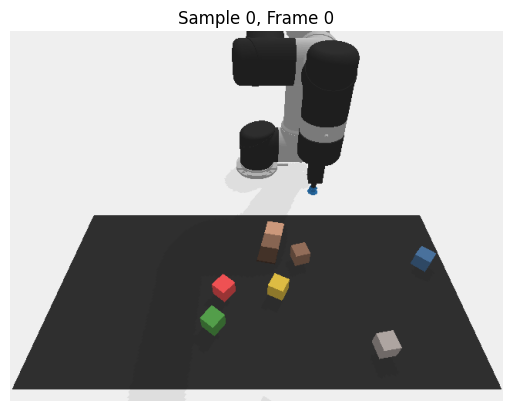

  Frame 1:


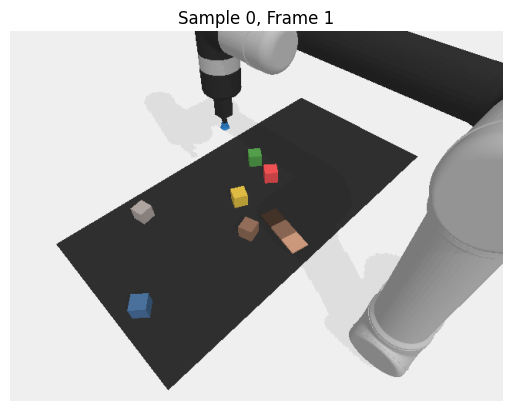

  Frame 2:


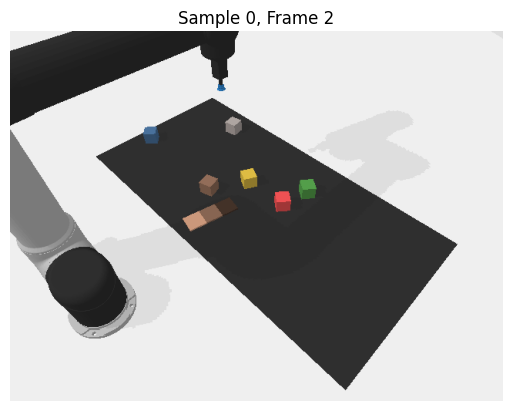

In [5]:
with open("data/stack-block-pyramid-seq-seen-colors-train/color/000000-0.pkl", "rb") as f:
    data = pkl.load(f)

print(type(data))
print(data.shape)
for sample_idx, sample in enumerate(data):
    print(f"Sample {sample_idx}:")
    
    # 遍历每个时间帧
    for frame_idx, frame in enumerate(sample):
        print(f"  Frame {frame_idx}:")

        # Matplotlib 显示图像
        plt.imshow(frame.astype('uint8'))  # 转为 uint8 类型以正确显示
        plt.title(f"Sample {sample_idx}, Frame {frame_idx}")
        plt.axis('off')  # 去掉坐标轴
        plt.show()
    break

<class 'numpy.ndarray'>
(8, 3, 480, 640)
Sample 0:
  Frame 0:


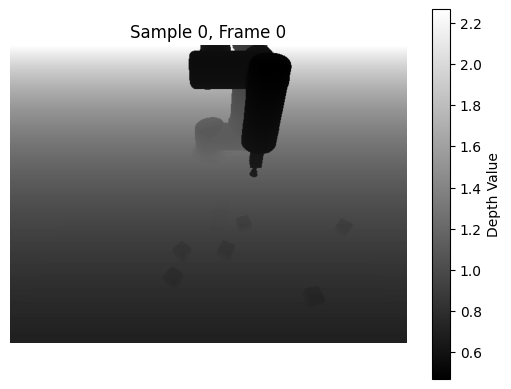

  Frame 1:


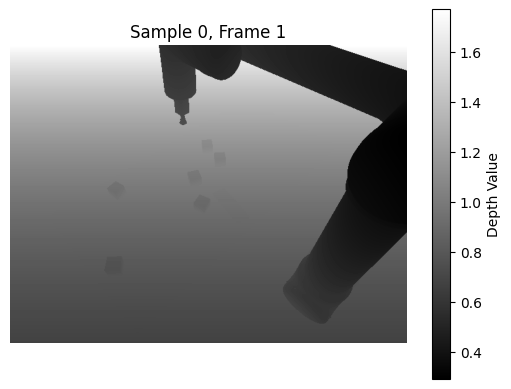

  Frame 2:


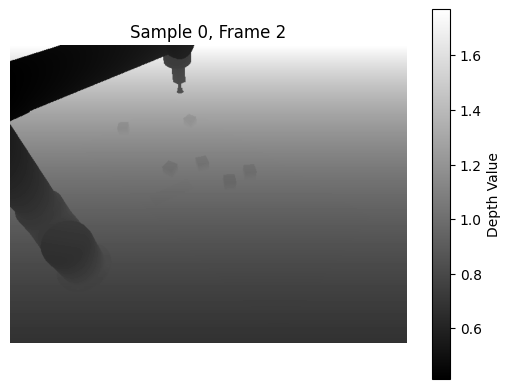

In [6]:
with open("data/stack-block-pyramid-seq-seen-colors-train/depth/000000-0.pkl", "rb") as f:
    data = pkl.load(f)

print(type(data))
print(data.shape)

for sample_idx, sample in enumerate(data):  # depth_data 是你的深度数据
    print(f"Sample {sample_idx}:")
    
    # 遍历每个时间帧
    for frame_idx, frame in enumerate(sample):
        print(f"  Frame {frame_idx}:")

        # 显示深度图（归一化到 [0, 1] 范围以便于显示）
        plt.imshow(frame, cmap='gray')  # 使用灰度图显示
        plt.title(f"Sample {sample_idx}, Frame {frame_idx}")
        plt.colorbar(label='Depth Value')  # 添加色条
        plt.axis('off')  # 去掉坐标轴
        plt.show()
    break

In [7]:
with open("data/stack-block-pyramid-seq-seen-colors-train/info/000000-0.pkl", "rb") as f:
    data = pkl.load(f)

print(type(data))
# print(data[0]['lang_goal'])
for sample_idx, sample_info in enumerate(data):  # 假设 info_data 是解析的列表
    print(f"Sample {sample_idx}:")
    
    # 遍历字典中的每个物体
    for obj_id, obj_data in sample_info.items():
        if obj_id == 'lang_goal':
            print(f"  Language Goal: {obj_data}")
        else:
            position, orientation, size = obj_data
            print(f"  Object ID: {obj_id}")
            print(f"    Position: {position}")
            print(f"    Orientation: {orientation}")
            print(f"    Size: {size}")
    break

<class 'list'>
Sample 0:
  Object ID: 5
    Position: (0.35625, 0.04062500000000002, 0.0025)
    Orientation: (0.0, 0.0, -0.7800583048932599, 0.6257068330832372)
    Size: (0.05, 0.05, 0.005)
  Object ID: 6
    Position: (0.415625, 0.11562500000000009, 0.02)
    Orientation: (0.0, 0.0, 0.9900753005916922, -0.14053789225070315)
    Size: (0.04, 0.04, 0.04)
  Object ID: 7
    Position: (0.609375, -0.09999999999999998, 0.02)
    Orientation: (0.0, 0.0, 0.8967882722968328, -0.44245993566747005)
    Size: (0.04, 0.04, 0.04)
  Object ID: 8
    Position: (0.5218750000000001, -0.08124999999999999, 0.02)
    Orientation: (0.0, 0.0, -0.3334919432342816, 0.9427529495036453)
    Size: (0.04, 0.04, 0.04)
  Object ID: 9
    Position: (0.43125, 0.44062500000000004, 0.02)
    Orientation: (0.0, 0.0, 0.9337021727903047, 0.3580506284405377)
    Size: (0.04, 0.04, 0.04)
  Object ID: 10
    Position: (0.665625, 0.28125, 0.02)
    Orientation: (0.0, 0.0, 0.995882681265404, -0.09065144872328179)
    Size: (

In [ ]:
with open("data/stack-block-pyramid-seq-seen-colors-train/reward/000000-0.pkl", "rb") as f:
    data = pkl.load(f)

print(type(data))
print(data)
# Reward used in reinforcement learning
# 0 or 0.0 indicates failure of the task, 0.16666666666666666 indicates success of the task, and a specific reward value, usually a score less than or equal to 1. The value here may represent partial completion of the task objective.
# For example: The task may be decomposed into 6 sub-goals, and a reward of 1/6 = 0.166666... is given for each completed sub-goal.

<class 'list'>
[0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666669, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663]


In [9]:
import os
import glob

input_folder = "data"
task_name = "stack-block-pyramid-seq-seen-colors"
mode = "train"
task_name = task_name + "-" + mode
input_folder = os.path.join(input_folder, task_name)
print(input_folder)

pose_path = glob.glob(os.path.join(input_folder, "action", "*.pkl"))
print(len(pose_path))

data/stack-block-pyramid-seq-seen-colors-train
1000


In [10]:
from natsort import natsorted
import torch

pose_paths = natsorted(glob.glob(f"{input_folder}/action/*.pkl"))
print(type(pose_paths))

<class 'list'>


In [37]:
from cliport.dataset import RavensDataset
data_dir = "data"
task = "stack-block-pyramid-seq-seen-colors"
n_demos = 100
cfg = {
    "dataset": {
        "type": 'single',
        "images": True,
        "cache": True,
        "augment":{"theta_sigma": 60},
        "in_shape": (640, 480, 6)
    }
}
train_ds = RavensDataset(os.path.join(data_dir, '{}-train'.format(task)), cfg, n_demos=n_demos, augment=True)

In [27]:
train_ds[0][0]
# len(train_ds)

{'img': array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00